# Baseline Model: TF-IDF + Logistic Regression
## Fake Job Posting Detection

This notebook trains and evaluates the baseline model using:
- TF-IDF vectorization
- Logistic Regression with class weights
- Evaluation metrics: Accuracy, Precision, Recall, F1-score


In [1]:
import pandas as pd
import numpy as np
import sys
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Set project root
project_root = Path(r'D:\Data 641 NLP\Final Project').resolve()
os.chdir(project_root)
sys.path.append(str(project_root / 'src'))

from baseline_model import BaselineModel
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


## 1. Load Processed Data


In [2]:
# Load processed data splits
train_df = pd.read_csv('data/processed/train.csv')
val_df = pd.read_csv('data/processed/val.csv')
test_df = pd.read_csv('data/processed/test.csv')

print("Data splits loaded:")
print(f"Train: {len(train_df)} samples")
print(f"  - Real: {len(train_df[train_df['fraudulent']==0])}, Fake: {len(train_df[train_df['fraudulent']==1])}")
print(f"\nValidation: {len(val_df)} samples")
print(f"  - Real: {len(val_df[val_df['fraudulent']==0])}, Fake: {len(val_df[val_df['fraudulent']==1])}")
print(f"\nTest: {len(test_df)} samples")
print(f"  - Real: {len(test_df[test_df['fraudulent']==0])}, Fake: {len(test_df[test_df['fraudulent']==1])}")


Data splits loaded:
Train: 12516 samples
  - Real: 11910, Fake: 606

Validation: 2682 samples
  - Real: 2552, Fake: 130

Test: 2682 samples
  - Real: 2552, Fake: 130


## 2. Prepare Data for Training


In [3]:
# Extract text and labels
X_train = train_df['combined_text']
y_train = train_df['fraudulent']

X_val = val_df['combined_text']
y_val = val_df['fraudulent']

X_test = test_df['combined_text']
y_test = test_df['fraudulent']

print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"Test samples: {len(X_test)}")


Training samples: 12516
Validation samples: 2682
Test samples: 2682


## 3. Train Baseline Model


In [4]:
# Initialize and train baseline model
model = BaselineModel(max_features=5000, ngram_range=(1, 2))
model.train(X_train, y_train)


INFO:baseline_model:Vectorizing training data...
INFO:baseline_model:Feature matrix shape: (12516, 5000)
INFO:baseline_model:Training Logistic Regression model...
INFO:baseline_model:Training complete!


## 4. Evaluate on Validation Set


Validation Set Evaluation:


INFO:baseline_model:Evaluation Results:
INFO:baseline_model:Accuracy: 0.9653
INFO:baseline_model:Precision: 0.5969
INFO:baseline_model:Recall: 0.8769
INFO:baseline_model:F1-Score: 0.7103
INFO:baseline_model:Confusion Matrix:
[[2475   77]
 [  16  114]]


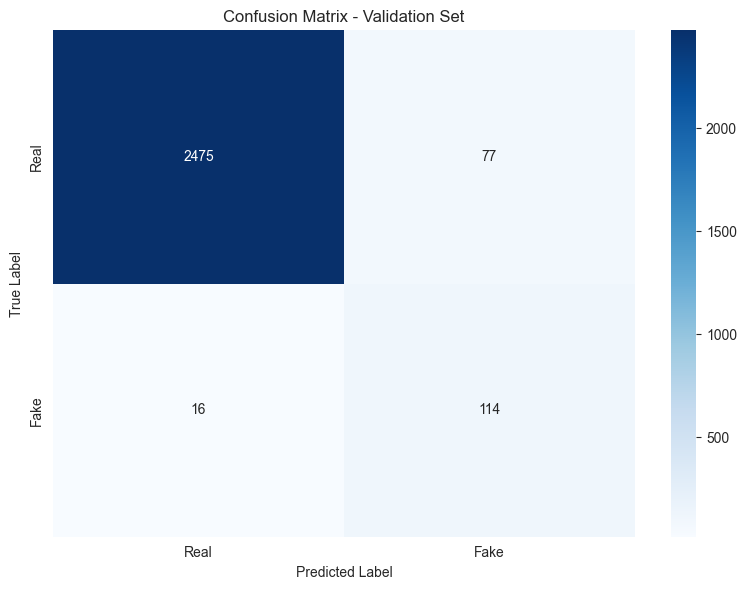

In [5]:
# Evaluate on validation set
print("Validation Set Evaluation:")
val_metrics = model.evaluate(X_val, y_val)

# Confusion matrix visualization
cm = confusion_matrix(y_val, model.predict(X_val))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix - Validation Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


## 5. Evaluate on Test Set


Test Set Evaluation:


INFO:baseline_model:Evaluation Results:
INFO:baseline_model:Accuracy: 0.9646
INFO:baseline_model:Precision: 0.5907
INFO:baseline_model:Recall: 0.8769
INFO:baseline_model:F1-Score: 0.7059
INFO:baseline_model:Confusion Matrix:
[[2473   79]
 [  16  114]]


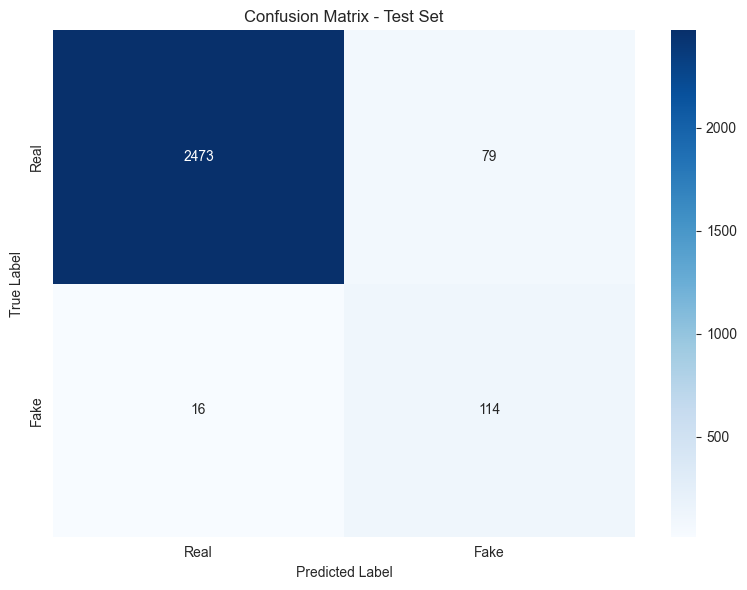


Classification Report:
              precision    recall  f1-score   support

        Real       0.99      0.97      0.98      2552
        Fake       0.59      0.88      0.71       130

    accuracy                           0.96      2682
   macro avg       0.79      0.92      0.84      2682
weighted avg       0.97      0.96      0.97      2682



In [6]:
# Evaluate on test set
print("Test Set Evaluation:")
test_metrics = model.evaluate(X_test, y_test)

# Confusion matrix visualization
cm_test = confusion_matrix(y_test, model.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix - Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, model.predict(X_test), 
                          target_names=['Real', 'Fake']))


## 6. Save Model


In [7]:
# Save the trained model
model.save('data/models')

print("Model saved successfully!")
print("Files saved:")
print("  - data/models/baseline_model.pkl")
print("  - data/models/baseline_vectorizer.pkl")


INFO:baseline_model:Model saved to data/models


Model saved successfully!
Files saved:
  - data/models/baseline_model.pkl
  - data/models/baseline_vectorizer.pkl


## 7. Summary


In [8]:
print("Baseline Model Training Complete!")
print(f"\nTest Set Performance:")
print(f"  Accuracy: {test_metrics['accuracy']:.4f}")
print(f"  Precision: {test_metrics['precision']:.4f}")
print(f"  Recall: {test_metrics['recall']:.4f}")
print(f"  F1-Score: {test_metrics['f1_score']:.4f}")

print(f"\nNext Steps:")
print("  1. Fine-tune BERT/DistilBERT model")
print("  2. Compare BERT performance with baseline")
print("  3. Analyze errors and improve model")


Baseline Model Training Complete!

Test Set Performance:
  Accuracy: 0.9646
  Precision: 0.5907
  Recall: 0.8769
  F1-Score: 0.7059

Next Steps:
  1. Fine-tune BERT/DistilBERT model
  2. Compare BERT performance with baseline
  3. Analyze errors and improve model
